### Include libraries

In [91]:
import pandas as pd # dataframes manipulation
import seaborn as sns # graphics
import matplotlib.pyplot as plt # graphics
#import numpy as np # numerical calcs
import pickle # data saving
from datetime import datetime

In [92]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

Help function for plot

In [93]:
def df_scatter(df, title, seperate_y_axis=False, y_axis_label='', scale='linear', initial_hide=False):
    '''Generate a scatter plot of the entire dataframe'''
    label_arr = list(df)
    series_arr = list(map(lambda col: df[col], label_arr))
    
    layout = go.Layout(
        title=title,
        legend=dict(orientation="h"),
        xaxis=dict(type='date'),
        yaxis=dict(
            title=y_axis_label,
            showticklabels= not seperate_y_axis,
            type=scale
        )
    )
    
    y_axis_config = dict(
        overlaying='y',
        showticklabels=False,
        type=scale )
    
    visibility = 'visible'
    if initial_hide:
        visibility = 'legendonly'
        
    # Form Trace For Each Series
    trace_arr = []
    for index, series in enumerate(series_arr):
        trace = go.Scatter(
            x=series.index, 
            y=series, 
            name=label_arr[index],
            visible=visibility
        )
        
        # Add seperate axis for the series
        if seperate_y_axis:
            trace['yaxis'] = 'y{}'.format(index + 1)
            layout['yaxis{}'.format(index + 1)] = y_axis_config    
        trace_arr.append(trace)

    fig = go.Figure(data=trace_arr, layout=layout)
    py.iplot(fig)

Read the data

In [97]:
df = pd.read_csv('main_coins.csv')

Simple insights using pandas

In [98]:
type(df)

pandas.core.frame.DataFrame

In [99]:
df.size

14982

In [100]:
df.shape

(1362, 11)

In [101]:
1362* 11

14982

In [102]:
df

,date,ETH,XMR,DASH,LTC,XRP,ETC,STR,SC,XEM,BTC
0,2015-01-01,NaN,0.449231,1.978678,2.711091,0.024008,NaN,0.005474,NaN,NaN,316.768392
1,2015-01-02,NaN,0.455994,1.974292,2.685418,0.024511,NaN,0.005536,NaN,NaN,315.785146
2,2015-01-03,NaN,0.473959,1.818238,2.389670,0.022297,NaN,0.005117,NaN,NaN,301.512433
3,2015-01-04,NaN,0.424769,1.705425,2.079496,0.018999,NaN,0.004521,NaN,NaN,276.706053
4,2015-01-05,NaN,0.413943,1.650610,2.076988,0.020051,NaN,0.004870,NaN,NaN,271.139494
5,2015-01-06,NaN,0.440428,1.667679,2.091707,0.020350,NaN,0.004928,NaN,NaN,274.256460
6,2015-01-07,NaN,0.462845,1.742234,2.183424,0.020957,NaN,0.005164,NaN,NaN,293.551047
7,2015-01-08,NaN,0.447558,1.730026,2.099834,0.020871,NaN,0.005563,NaN,NaN,290.364003
8,2015-01-09,NaN,0.428848,1.747407,2.051141,0.021352,NaN,0.005792,NaN,NaN,291.770886
9,2015-01-10,NaN,0.403604,1.711341,1.801965,0.020094,NaN,0.005455,NaN,NaN,282.503461


In [103]:
df.dtypes

date     object
ETH     float64
XMR     float64
DASH    float64
LTC     float64
XRP     float64
ETC     float64
STR     float64
SC      float64
XEM     float64
BTC     float64
dtype: object

In [104]:
df.date.unique().size

1362

In [105]:
df.describe()

,ETH,XMR,DASH,LTC,XRP,ETC,STR,SC,XEM,BTC
count,1140.000000,1359.000000,1359.000000,1359.000000,1359.000000,789.000000,1359.000000,1123.000000,1270.000000,1359.000000
mean,212.330475,59.409163,148.410358,39.924956,0.198561,12.207211,0.070814,0.006155,0.128797,2908.625413
std,282.998816,93.651828,238.279963,62.770938,0.364733,9.852891,0.134098,0.009628,0.234943,3811.381068
min,0.448203,0.237247,1.174390,1.336845,0.004089,0.634094,0.001408,0.000012,0.000086,195.668342
25%,9.574091,0.588154,3.595927,3.278284,0.006584,1.494351,0.002003,0.000206,0.000573,375.746447
50%,17.366727,8.249782,11.451923,4.012853,0.008639,13.350773,0.002923,0.000677,0.006365,728.992009
75%,334.326815,94.158179,227.847449,55.326607,0.247055,17.355791,0.038688,0.009326,0.200231,5616.613583
max,1363.949636,425.913240,1402.425173,346.905402,2.958787,43.423449,0.785691,0.064279,1.822529,19237.154813


Notice that some values are NaN at the beginning, so let's check the first data points for each currency.

In [106]:
df.date.unique()

array(['2015-01-01', '2015-01-02', '2015-01-03', ..., '2018-09-21',
       '2018-09-22', '2018-09-23'], dtype=object)

Get the whole column, i.e. how we access df:

In [107]:
df['ETH'].shape

(1362,)

Where is the first NaN

In [108]:
first_non_nan_row = df['ETH'].first_valid_index()
first_non_nan_row

219

Accessing df by numerical indexes

In [109]:
df.iloc[1,2]

0.4559937510045

Access row by index and get just one column

In [110]:
df.iloc[first_non_nan_row]['date']

'2015-08-08'

Repeat that for all the columns

In [111]:
df.columns

Index(['date', 'ETH', 'XMR', 'DASH', 'LTC', 'XRP', 'ETC', 'STR', 'SC', 'XEM',
       'BTC'],
      dtype='object')

In [112]:
for col in df.columns:
    print(col, df.iloc[df[col].first_valid_index()]['date'])

date 2015-01-01
ETH 2015-08-08
XMR 2015-01-01
DASH 2015-01-01
LTC 2015-01-01
XRP 2015-01-01
ETC 2016-07-24
STR 2015-01-01
SC 2015-08-25
XEM 2015-03-31
BTC 2015-01-01


In [113]:
#df[['date','BTC']].set_index('date').plot()

In [114]:
#sns.tsplot(df['BTC'])

### Price analysis

Simple visualization with matplotlib

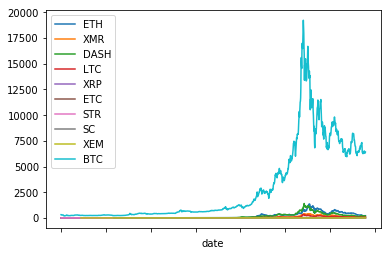

In [115]:
df.set_index(df['date']).plot()

Bitcoin has significantly bigger value, so it noises the rest of them. Let's remove it then.

In [116]:
df_no_btc = df.drop(['BTC'], axis=1)
df_no_btc

,date,ETH,XMR,DASH,LTC,XRP,ETC,STR,SC,XEM
0,2015-01-01,NaN,0.449231,1.978678,2.711091,0.024008,NaN,0.005474,NaN,NaN
1,2015-01-02,NaN,0.455994,1.974292,2.685418,0.024511,NaN,0.005536,NaN,NaN
2,2015-01-03,NaN,0.473959,1.818238,2.389670,0.022297,NaN,0.005117,NaN,NaN
3,2015-01-04,NaN,0.424769,1.705425,2.079496,0.018999,NaN,0.004521,NaN,NaN
4,2015-01-05,NaN,0.413943,1.650610,2.076988,0.020051,NaN,0.004870,NaN,NaN
5,2015-01-06,NaN,0.440428,1.667679,2.091707,0.020350,NaN,0.004928,NaN,NaN
6,2015-01-07,NaN,0.462845,1.742234,2.183424,0.020957,NaN,0.005164,NaN,NaN
7,2015-01-08,NaN,0.447558,1.730026,2.099834,0.020871,NaN,0.005563,NaN,NaN
8,2015-01-09,NaN,0.428848,1.747407,2.051141,0.021352,NaN,0.005792,NaN,NaN
9,2015-01-10,NaN,0.403604,1.711341,1.801965,0.020094,NaN,0.005455,NaN,NaN


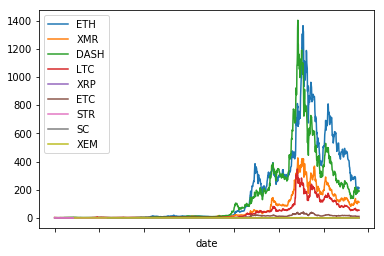

In [117]:
df_no_btc.set_index(df['date']).plot()

Nicer visualizations with Plotly

In [118]:
df.set_index('date', inplace=True)

In [119]:
df_scatter(df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='lin')

ValueError: 
    Invalid value of type 'builtins.str' received for the 'type' property of layout.yaxis
        Received value: 'lin'

    The 'type' property is an enumeration that may be specified as:
      - One of the following enumeration values:
            ['-', 'linear', 'log', 'date', 'category']

Let's change the scale of the chart to logarithmic

In [50]:
df_scatter(df, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='log')

and without BTC:

In [31]:
df_scatter(df_no_btc, 'Cryptocurrency Prices (USD)', seperate_y_axis=False, y_axis_label='Coin Value (USD)', scale='lin')

### Maximum ROI in 2017 

In [120]:
jan = df.loc['2017-01-01']
dec = df.loc['2017-12-17']

In [121]:
dec / jan

ETH      85.084698
XMR      25.045507
DASH     94.366749
LTC      70.944148
XRP     112.038843
ETC      23.973167
STR     105.193814
SC       67.688600
XEM     196.767000
BTC      19.460473
dtype: float64

### Growth between min and max value.
For each currency get the minimum value before december 2017.

In [122]:
df1 = df.where((df['date'] > '2017-01-01') & (df['date'] < '2017-12-01'))
minimums = df1.min()

KeyError: 'date'

In [123]:
df1 = df.where(df['date'] >= '2017-12-01')
maximums = df1.max()

KeyError: 'date'

How many times each currency has grown?

In [124]:
gains = maximums / minimums
gains

NameError: name 'maximums' is not defined

## What if you invested 100€ in January and sell it in December 2017...

In [125]:
100 * gains

NameError: name 'gains' is not defined

### Correlation heatmaps

### 2016

In [126]:
combined_df_2016 = df[df.index.str.contains("2016")]
combined_df_2016.pct_change().corr(method='pearson')

,ETH,XMR,DASH,LTC,XRP,ETC,STR,SC,XEM,BTC
ETH,1.000000,0.087216,0.122695,-0.064652,0.085630,-0.181991,0.035093,0.169642,0.043205,-0.006502
XMR,0.087216,1.000000,0.121537,0.129475,0.027649,-0.105898,0.027998,0.047910,0.016438,0.127520
DASH,0.122695,0.121537,1.000000,-0.012194,0.088657,0.003992,0.058083,0.026602,0.014571,-0.014040
LTC,-0.064652,0.129475,-0.012194,1.000000,0.053712,-0.131079,0.113523,0.012253,0.160667,0.750174
XRP,0.085630,0.027649,0.088657,0.053712,1.000000,-0.054095,0.320116,0.021098,0.101326,0.044161
ETC,-0.181991,-0.105898,0.003992,-0.131079,-0.054095,1.000000,-0.102654,-0.008066,-0.080938,-0.170538
STR,0.035093,0.027998,0.058083,0.113523,0.320116,-0.102654,1.000000,0.143252,0.225132,0.079075
SC,0.169642,0.047910,0.026602,0.012253,0.021098,-0.008066,0.143252,1.000000,0.106153,0.035116
XEM,0.043205,0.016438,0.014571,0.160667,0.101326,-0.080938,0.225132,0.106153,1.000000,0.227674
BTC,-0.006502,0.127520,-0.014040,0.750174,0.044161,-0.170538,0.079075,0.035116,0.227674,1.000000


In [127]:
def correlation_heatmap(df, title, absolute_bounds=True):
    '''Plot a correlation heatmap for the entire dataframe'''
    heatmap = go.Heatmap(
        z=df.corr(method='pearson').as_matrix(),
        x=df.columns,
        y=df.columns,
        colorbar=dict(title='Pearson Coefficient'),
    )
    
    layout = go.Layout(title=title)
    
    if absolute_bounds:
        heatmap['zmax'] = 1.0
        heatmap['zmin'] = -1.0
        
    fig = go.Figure(data=[heatmap], layout=layout)
    py.iplot(fig)

In [128]:
correlation_heatmap(combined_df_2016.pct_change(), "Cryptocurrency Correlations in 2016")

/Users/barrysheppard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



### 2017

In [129]:
combined_df_2017 = df[df.index.str.contains("2017")]
combined_df_2017.pct_change().corr(method='pearson')

,ETH,XMR,DASH,LTC,XRP,ETC,STR,SC,XEM,BTC
ETH,1.000000,0.554632,0.506911,0.437609,0.212350,0.601437,0.259399,0.373078,0.399200,0.410771
XMR,0.554632,1.000000,0.498418,0.437204,0.226636,0.447398,0.327488,0.378644,0.336076,0.409183
DASH,0.506911,0.498418,1.000000,0.340153,0.091146,0.387555,0.183038,0.291424,0.325968,0.307095
LTC,0.437609,0.437204,0.340153,1.000000,0.323905,0.482062,0.307589,0.339144,0.379088,0.420645
XRP,0.212350,0.226636,0.091146,0.323905,1.000000,0.114780,0.509828,0.243872,0.268168,0.131469
ETC,0.601437,0.447398,0.387555,0.482062,0.114780,1.000000,0.210387,0.298406,0.321852,0.416562
STR,0.259399,0.327488,0.183038,0.307589,0.509828,0.210387,1.000000,0.402966,0.339502,0.230957
SC,0.373078,0.378644,0.291424,0.339144,0.243872,0.298406,0.402966,1.000000,0.331350,0.325318
XEM,0.399200,0.336076,0.325968,0.379088,0.268168,0.321852,0.339502,0.331350,1.000000,0.329431
BTC,0.410771,0.409183,0.307095,0.420645,0.131469,0.416562,0.230957,0.325318,0.329431,1.000000


In [130]:
correlation_heatmap(combined_df_2017.pct_change(), "Cryptocurrency Correlations in 2017")

/Users/barrysheppard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



### 2018

In [131]:
combined_df_2018 = df[df.index.str.contains("2018")]
combined_df_2018.pct_change().corr(method='pearson')
correlation_heatmap(combined_df_2018.pct_change(), "Cryptocurrency Correlations in 2018")

/Users/barrysheppard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



### Cryptocurrencies analysis by their market cap

In [132]:
cc = pd.read_csv('cryptocurrencies_prices.csv')

FileNotFoundError: File b'cryptocurrencies_prices.csv' does not exist

In [65]:
cc.shape

(1381, 16)

In [66]:
cc.drop('Unnamed: 0',1, inplace = True) 

In [67]:
cc.describe()

,rank,price_usd,price_btc,X24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
count,1381.000000,1.379000e+03,1.379000e+03,1.329000e+03,1.079000e+03,1.079000e+03,1.262000e+03,2.460000e+02,1333.000000,1338.000000,1325.000000,1.379000e+03
mean,691.000000,1.026734e+03,7.660527e-02,2.833863e+07,5.812979e+08,8.663087e+09,7.481779e+11,4.102795e+12,1.440503,10.530665,48.135366,1.514872e+09
std,398.804672,2.596996e+04,1.937795e+00,4.327306e+08,7.991407e+09,1.212343e+11,2.596479e+13,6.375730e+13,11.069061,48.848918,147.830766,6.330238e+04
min,1.000000,6.834000e-07,5.000000e-11,3.215090e-01,1.300000e+01,0.000000e+00,1.000000e+00,3.000000e+02,-77.050000,-81.090000,-85.500000,1.513174e+09
25%,346.000000,9.381260e-03,7.000000e-07,1.346930e+03,4.484825e+05,5.149190e+06,9.099396e+06,2.300000e+07,0.000000,-3.740000,-8.110000,1.514877e+09
50%,691.000000,1.243690e-01,9.280000e-06,2.159430e+04,4.326552e+06,2.302034e+07,4.501932e+07,1.010000e+08,1.210000,2.005000,13.240000,1.514877e+09
75%,1036.000000,1.011665e+00,7.549000e-05,5.713690e+05,3.601664e+07,1.189226e+08,2.859684e+08,9.993610e+08,2.000000,14.997500,54.780000,1.514877e+09
max,1381.000000,8.749520e+05,6.528620e+01,1.425430e+10,2.261783e+11,3.386511e+12,9.223429e+14,1.000000e+15,236.750000,937.700000,3252.430000,1.514877e+09


In [68]:
cc.sort_values('market_cap_usd', ascending = False)
cc.head(10)

,id,name,symbol,rank,price_usd,price_btc,X24h_volume_usd,market_cap_usd,available_supply,total_supply,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,last_updated
0,bitcoin,Bitcoin,BTC,1,13481.300000,1.000000,1.425430e+10,2.261783e+11,1.677719e+07,1.677719e+07,2.100000e+07,0.88,-3.32,-10.65,1.514877e+09
1,ripple,Ripple,XRP,2,2.299330,0.000172,2.126830e+09,8.907408e+10,3.873914e+10,9.999309e+10,1.000000e+11,1.85,2.03,104.76,1.514877e+09
2,ethereum,Ethereum,ETH,3,881.320000,0.065761,4.720680e+09,8.524008e+10,9.671865e+07,9.671865e+07,NaN,0.88,14.21,13.91,1.514877e+09
3,bitcoin-cash,Bitcoin Cash,BCH,4,2448.160000,0.182674,1.086780e+09,4.134667e+10,1.688888e+07,1.688888e+07,2.100000e+07,0.13,-2.59,-18.72,1.514877e+09
4,cardano,Cardano,ADA,5,0.705031,0.000053,1.581580e+08,1.827939e+10,2.592707e+10,3.111248e+10,4.500000e+10,0.69,-0.43,68.51,1.514877e+09
5,litecoin,Litecoin,LTC,6,245.097000,0.018288,8.463070e+08,1.337681e+10,5.457763e+07,5.457763e+07,8.400000e+07,1.75,5.04,-12.85,1.514877e+09
6,iota,IOTA,MIOTA,7,4.106610,0.000306,3.030400e+08,1.141445e+10,2.779530e+09,2.779530e+09,2.779530e+09,4.69,13.19,13.13,1.514877e+09
7,nem,NEM,XEM,8,1.089290,0.000081,6.290140e+07,9.803610e+09,9.000000e+09,9.000000e+09,NaN,1.73,2.39,11.84,1.514877e+09
8,dash,Dash,DASH,9,1121.350000,0.083672,1.785350e+08,8.734783e+09,7.789524e+06,7.789524e+06,1.890000e+07,-0.11,6.29,-6.88,1.514877e+09
9,stellar,Stellar,XLM,10,0.483887,0.000036,5.248690e+08,8.650507e+09,1.787712e+10,1.035705e+11,NaN,2.00,7.18,115.87,1.514877e+09


Simple price distribution plot

/home/hubert/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



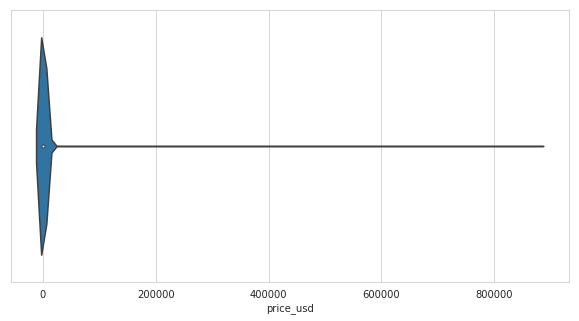

In [69]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,5)
sns.violinplot(cc.dropna(subset = ['price_usd']).price_usd)

### Listing of coins/tokens with more per unit price than Ethereum

Text(0.5,1,'Currencies/tokens more than the price of Ethereum')

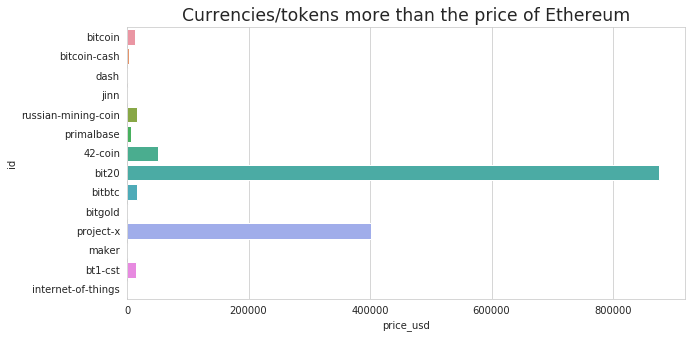

In [70]:
more_than_ethereum = cc[['id','price_usd']][cc['price_usd'].gt(float(cc.loc[cc.id=='ethereum','price_usd']))]
# plot
#sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
sns.set_style("whitegrid")
fig.set_size_inches(10,5)
sns.barplot('price_usd','id',data=more_than_ethereum)
hfont = {'fontsize':'xx-large'}
plt.title('Currencies/tokens more than the price of Ethereum',**hfont)

Text(0.5,1,'Top 10 Coins based on Market cap')

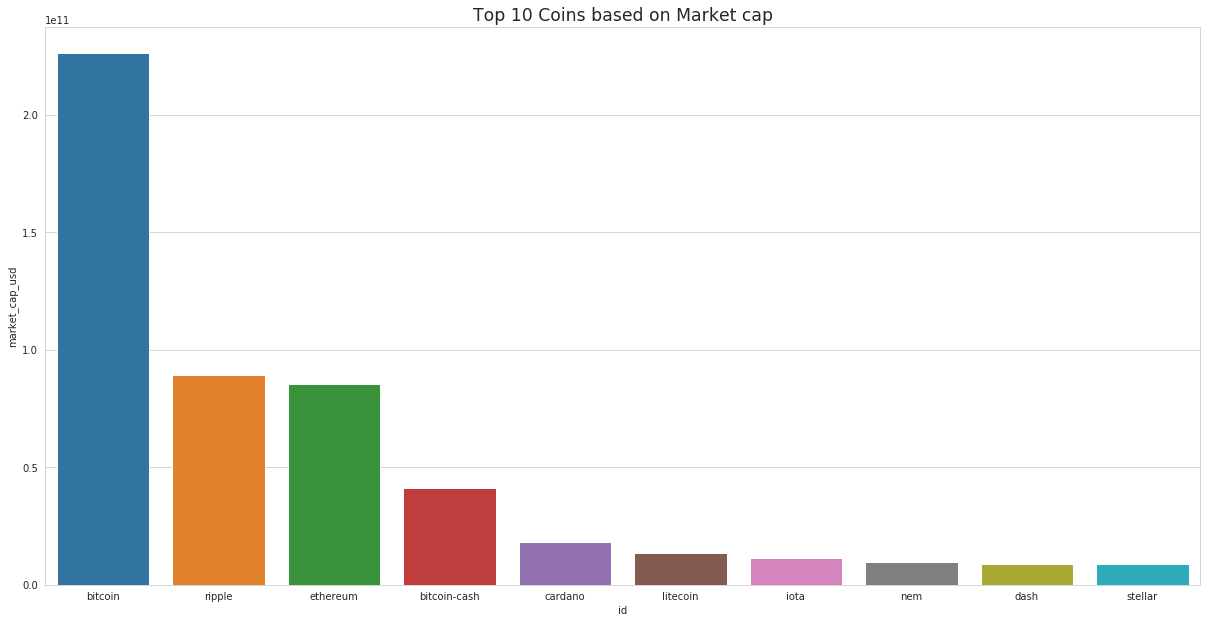

In [71]:
# plot
#sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(20.7, 10.27)

sns.set_style("whitegrid")
sns.barplot("id",'market_cap_usd',data=cc[:10], ax = ax)
hfont = {'fontsize':'xx-large'}
plt.title('Top 10 Coins based on Market cap',**hfont)

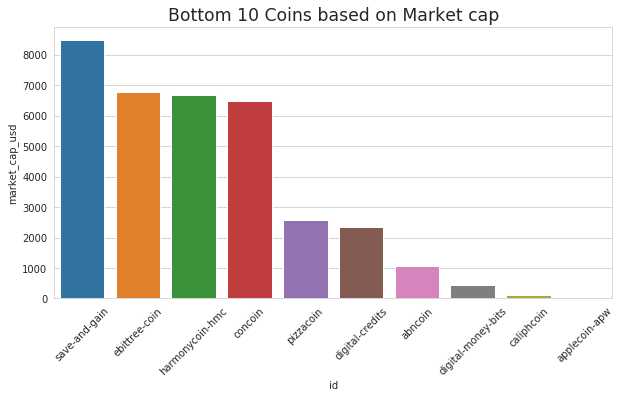

In [72]:
# plot
#sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10, 5)

sns.set_style("whitegrid")
sns.barplot("id",'market_cap_usd',data=cc.dropna(subset = ['market_cap_usd']).sort_values('market_cap_usd', ascending = False).tail(10), ax = ax)
hfont = {'fontsize':'xx-large'}
plt.title('Bottom 10 Coins based on Market cap',**hfont)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)

In [108]:
#df[df['DateTime'] == '6/26/2017 20:00'].size

In [109]:
#df[df['DateTime'] == '6/26/2017 20:00']

SELECT * FROM df WHERE DateTime = '6/26/2017 20:00'

In [110]:
#last = df[df['DateTime'] == '6/26/2017 20:00']

In [111]:
#last.sort_values(by='Volume', ascending=False)